In [4]:
# importar librerias
import numpy as np
import pandas as pd
import ast

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) # show alll columns

-----------

In [5]:
# get data
df1 = pd.read_parquet('/content/drive/MyDrive/DataYelpGoogle/Data/Cluster_CountVectorizer_KMeans.parquet')
# get data
df = pd.read_parquet('/content/drive/MyDrive/DataYelpGoogle/Data/MLBusinessReviewsB.parquet')

In [6]:
# info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59292 entries, 0 to 59291
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   review_id      59292 non-null  object 
 1   business_id    59292 non-null  object 
 2   business_name  59292 non-null  object 
 3   categories     59292 non-null  object 
 4   state          59292 non-null  object 
 5   user_id        59292 non-null  object 
 6   rating         59292 non-null  float64
 7   review         59292 non-null  object 
 8   dataset        59292 non-null  object 
dtypes: float64(1), object(8)
memory usage: 4.1+ MB


In [7]:
# show data
df.head(5)

,review_id,business_id,business_name,categories,state,user_id,rating,review,dataset
0,u0R5mh6DcG64-lCZ0_0R2g,-IRJAg0tkspFukxKY87TBA,Blue Mountain Vineyards & Cellars,"[wineries, arts & entertainment, food]",Pennsylvania,Pu1BCVdqDiqBd9ZAww1WLQ,5.0,This is one of my favorite wineries in the are...,Yelp
1,GIwkTphPr94sBK5bsc7swQ,-IRJAg0tkspFukxKY87TBA,Blue Mountain Vineyards & Cellars,"[wineries, arts & entertainment, food]",Pennsylvania,SFikfdv5c2EQpYkBT06BKg,5.0,Great ambiance and amazing customer service. H...,Yelp
2,Y00_edNYozvU-v67woiwQw,-IRJAg0tkspFukxKY87TBA,Blue Mountain Vineyards & Cellars,"[wineries, arts & entertainment, food]",Pennsylvania,mHwAD8Pna7cVYxLqwMJ9jg,4.0,Went on a sisters date in New Tripoli Pa! Ver...,Yelp
3,c_ahpu3COhU1YHcNqICxAQ,-IRJAg0tkspFukxKY87TBA,Blue Mountain Vineyards & Cellars,"[wineries, arts & entertainment, food]",Pennsylvania,bUyZ3DN2nKPhZNjtTnWMlA,3.0,This review is exclusively for the Philadelphi...,Yelp
4,9lUFa_m9JGnpwq5Y6FqAHg,-IRJAg0tkspFukxKY87TBA,Blue Mountain Vineyards & Cellars,"[wineries, arts & entertainment, food]",Pennsylvania,-lzEhC7Tva783XLehv_44w,5.0,Best wine tasting ever!!\nThe staff was extrem...,Yelp


In [8]:
df1 = df1[['review processed',	'lenght review', 'cluster']]
df1.cluster = df1.cluster.astype('object')

<ipython-input-8-dce66d07a274>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.cluster = df1.cluster.astype('object')


In [9]:
# info data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59292 entries, 0 to 59291
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review processed  59292 non-null  object
 1   lenght review     59292 non-null  int64 
 2   cluster           59292 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [10]:
# show data
df1.head(5)

,review processed,lenght review,cluster
0,one favorite winery area really good variety s...,102,1
1,great ambiance amazing customer service highly...,10,1
2,go sister date new tripoli nice staff great to...,19,1
3,review exclusively philadelphia location never...,97,1
4,best wine taste ever staff extremely knowledge...,25,1


In [11]:
df = pd.concat([df, df1], axis=1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59292 entries, 0 to 59291
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   review_id         59292 non-null  object 
 1   business_id       59292 non-null  object 
 2   business_name     59292 non-null  object 
 3   categories        59292 non-null  object 
 4   state             59292 non-null  object 
 5   user_id           59292 non-null  object 
 6   rating            59292 non-null  float64
 7   review            59292 non-null  object 
 8   dataset           59292 non-null  object 
 9   review processed  59292 non-null  object 
 10  lenght review     59292 non-null  int64  
 11  cluster           59292 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 5.4+ MB


In [13]:
df.head()

,review_id,business_id,business_name,categories,state,user_id,rating,review,dataset,review processed,lenght review,cluster
0,u0R5mh6DcG64-lCZ0_0R2g,-IRJAg0tkspFukxKY87TBA,Blue Mountain Vineyards & Cellars,"[wineries, arts & entertainment, food]",Pennsylvania,Pu1BCVdqDiqBd9ZAww1WLQ,5.0,This is one of my favorite wineries in the are...,Yelp,one favorite winery area really good variety s...,102,1
1,GIwkTphPr94sBK5bsc7swQ,-IRJAg0tkspFukxKY87TBA,Blue Mountain Vineyards & Cellars,"[wineries, arts & entertainment, food]",Pennsylvania,SFikfdv5c2EQpYkBT06BKg,5.0,Great ambiance and amazing customer service. H...,Yelp,great ambiance amazing customer service highly...,10,1
2,Y00_edNYozvU-v67woiwQw,-IRJAg0tkspFukxKY87TBA,Blue Mountain Vineyards & Cellars,"[wineries, arts & entertainment, food]",Pennsylvania,mHwAD8Pna7cVYxLqwMJ9jg,4.0,Went on a sisters date in New Tripoli Pa! Ver...,Yelp,go sister date new tripoli nice staff great to...,19,1
3,c_ahpu3COhU1YHcNqICxAQ,-IRJAg0tkspFukxKY87TBA,Blue Mountain Vineyards & Cellars,"[wineries, arts & entertainment, food]",Pennsylvania,bUyZ3DN2nKPhZNjtTnWMlA,3.0,This review is exclusively for the Philadelphi...,Yelp,review exclusively philadelphia location never...,97,1
4,9lUFa_m9JGnpwq5Y6FqAHg,-IRJAg0tkspFukxKY87TBA,Blue Mountain Vineyards & Cellars,"[wineries, arts & entertainment, food]",Pennsylvania,-lzEhC7Tva783XLehv_44w,5.0,Best wine tasting ever!!\nThe staff was extrem...,Yelp,best wine taste ever staff extremely knowledge...,25,1


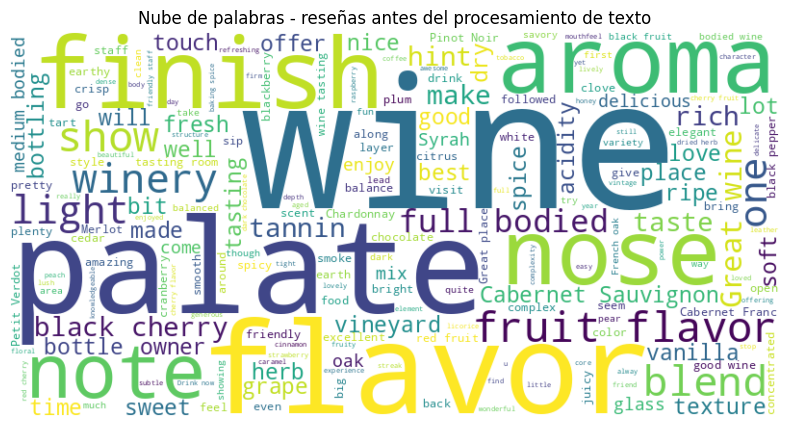

In [ ]:
# Nube de palabras - reseñas antes del procesamiento de texto
# Filtrar y limpiar las reseñas si es necesario
filtered_reviews = df['review'].dropna().astype(str)

# Unir todas las reseñas en un solo texto
all_reviews = " ".join(filtered_reviews)

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras - reseñas antes del procesamiento de texto')
plt.show()


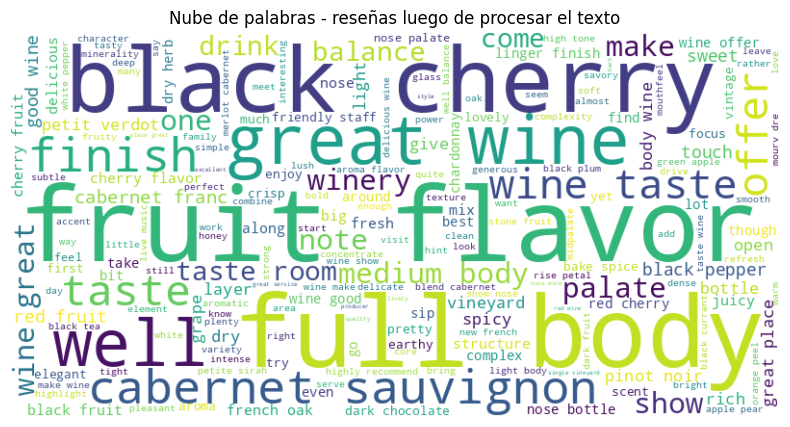

In [ ]:
# Nube de palabras - reseñas luego de procesar el texto
# Filtrar y limpiar las reseñas si es necesario
filtered_reviews = df['review processed'].dropna().astype(str)

# Unir todas las reseñas en un solo texto
all_reviews = " ".join(filtered_reviews)

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras - reseñas luego de procesar el texto')
plt.show()


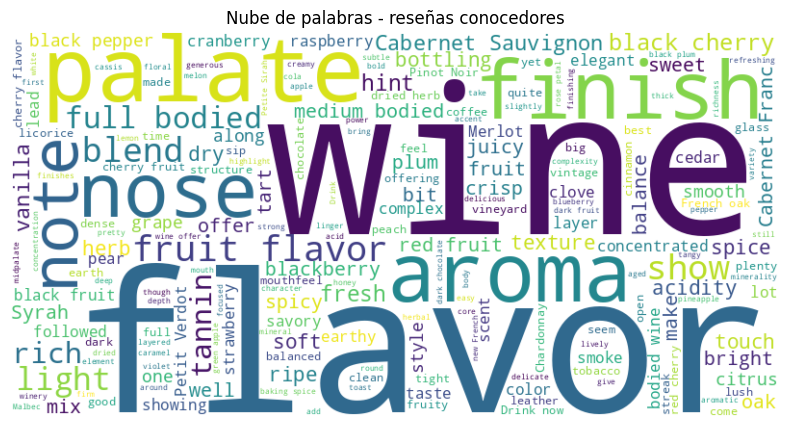

In [ ]:
#Nube de Palabras de Reseñas conocedores

# Filtra las reseñas por longitud (2 a 10 palabras)
filtered_reviews = df[df['cluster']==0]['review']

# Crea un solo string con todas las reseñas filtradas
all_reviews = " ".join(filtered_reviews.astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras - reseñas conocedores')
plt.show()

In [ ]:
# reseñas conocedores
df[df['cluster']==0]['review']

148      Best pick your own veggies, herbs and fruits i...
1003     Absolutely outstanding! Excellent take on frui...
1185     Mini cheeseburgers dry, pizza ok, drinks many ...
1488     Definitely tasty and no need to be hasty when ...
3332     Visited with friends between wedding and recep...
                               ...                        
59286    This is classic in herbaceous aromas and flavo...
59287    Hailing from one of the more popular vineyards...
59289    This opens with herbaceous dollops of thyme an...
59290    This Zinfandel from the eastern section of Nap...
59291    Citation is given as much as a decade of bottl...
Name: review, Length: 32329, dtype: object

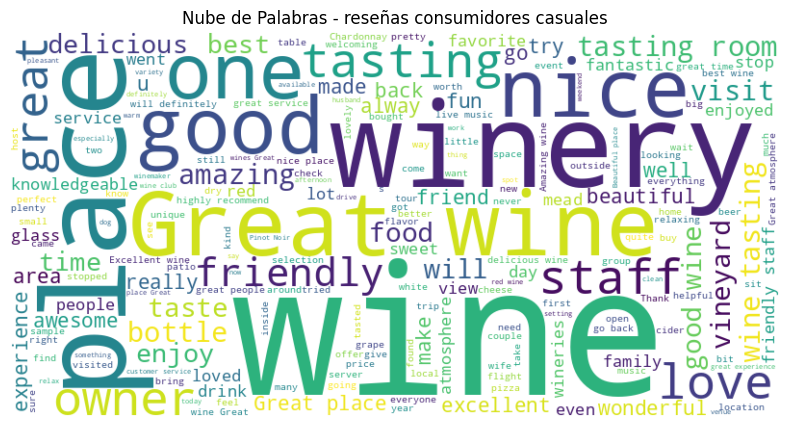

In [ ]:
#Nube de Palabras de Reseñas consumidores casuales

# Filtra las reseñas por longitud (2 a 10 palabras)
filtered_reviews = df[df['cluster']==1]['review']

# Crea un solo string con todas las reseñas filtradas
all_reviews = " ".join(filtered_reviews.astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - reseñas consumidores casuales')
plt.show()

In [ ]:
# Reseñas conosumidores casuales
df[df['cluster']==1]['review']

0        This is one of my favorite wineries in the are...
1        Great ambiance and amazing customer service. H...
2        Went on a sisters date in  New Tripoli Pa! Ver...
3        This review is exclusively for the Philadelphi...
4        Best wine tasting ever!!\nThe staff was extrem...
                               ...                        
59249    Tremendously pretty with honeysuckle and apric...
59256    Maldonado is set in a fairly cool area of the ...
59264    This wine is made from a field blend that incl...
59275    Aged entirely in stainless steel, this combine...
59288    There's no bones about the use of oak in this ...
Name: review, Length: 26963, dtype: object

Se identifica que en las reviews de los conocedores destacan palabras relacionadas a la textura, color, sabor (sensaciones que experimenta el consumidor en cuanto a sus sentidos del gusto, olfato...). Por el contrario en las reviews de consumidores casulaes predominan palabras relacionadas a las instalaciones, atencion del personal, acompañantes (experiencia del consumidor en cuanto de los servicios ofertados por el lugar)

------------

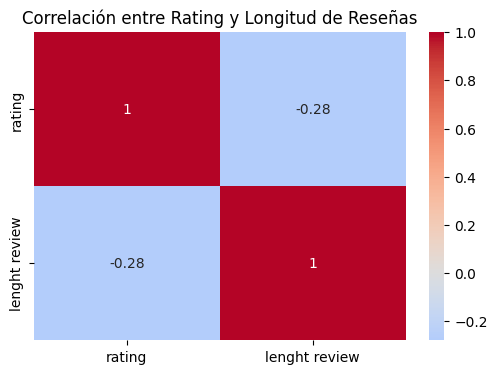

In [ ]:
#Correlación entre Rating y Longitud de Reseñas
import seaborn as sns
# Filtra las reseñas no nulas
filtered_reviews = df['review'].notna()

# Calcula la correlación entre el rating y la longitud de las reseñas
correlation_matrix = df[filtered_reviews][['rating', 'lenght review']].corr()


plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlación entre Rating y Longitud de Reseñas')
plt.show()

In [ ]:
# variables numericas
df.describe()

,rating,lenght review
count,59292.000000,59292.000000
mean,4.259141,21.579252
std,0.664941,13.417761
min,1.000000,0.000000
25%,4.000000,13.000000
50%,4.000000,22.000000
75%,5.000000,29.000000
max,5.000000,422.000000


In [ ]:
# promedio rating conocedor
df[df['cluster']==0]['rating'].mean()

3.964180766494479

In [ ]:
# promedio rating consumidor casual
df[df['cluster']==1]['rating'].mean()

4.61280272966658

En promedio del rating de las reviews se encuentra en 4.25 y la longitud de las reviews mayor a 21 palabras en promedio. Se identifica que el promedio del rating reviews conocedores 3.96 bajo 4 y el promedio general , mientras el promedio rating reviews consumidores casuales 4.61 por encima de 4 y el promedio general.

---------------

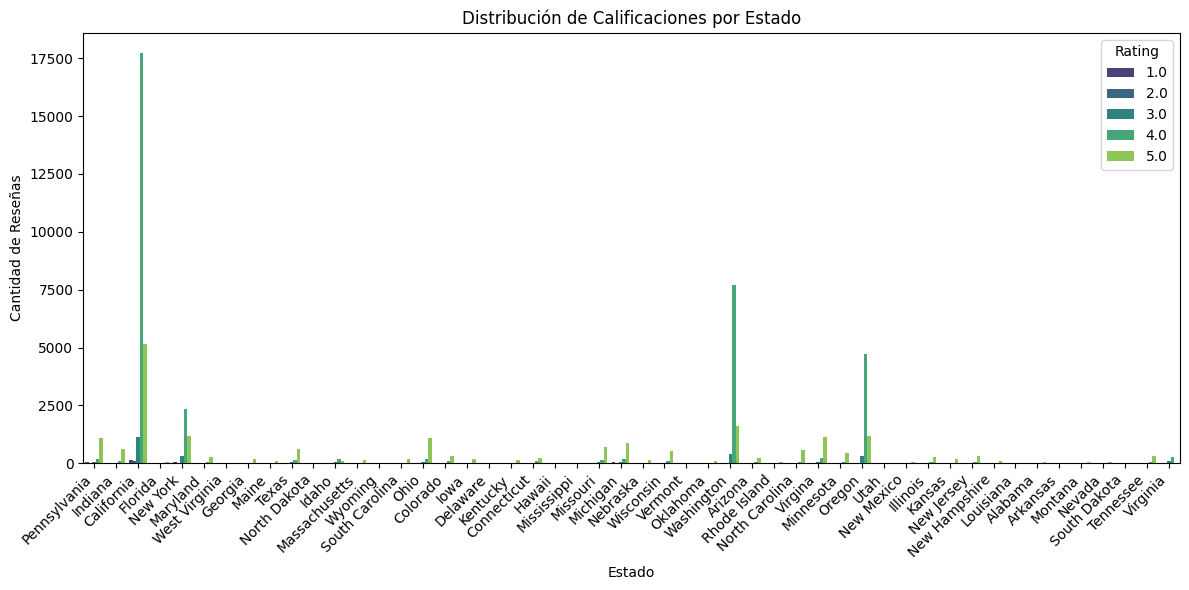

In [ ]:
#Distribucion de Calificaciones por Estado
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='state', hue='rating', palette='viridis')
plt.title('Distribución de Calificaciones por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Reseñas')
plt.legend(title='Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


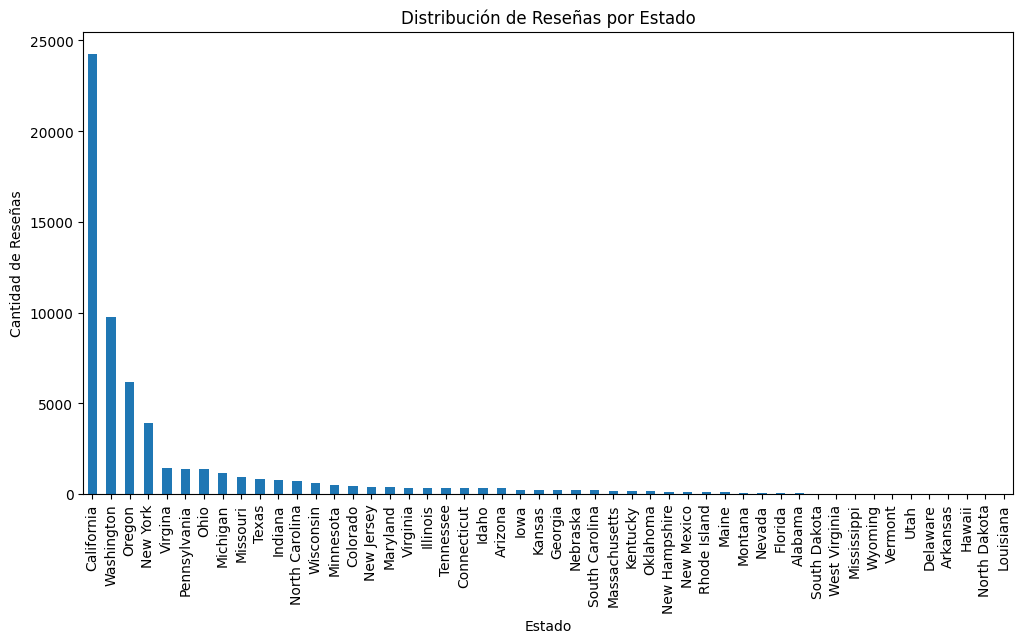

In [ ]:
# Contar la cantidad de reseñas por estado
state_counts = df['state'].value_counts()

plt.figure(figsize=(12, 6))
state_counts.plot(kind='bar')
plt.title('Distribución de Reseñas por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Reseñas')
plt.show()

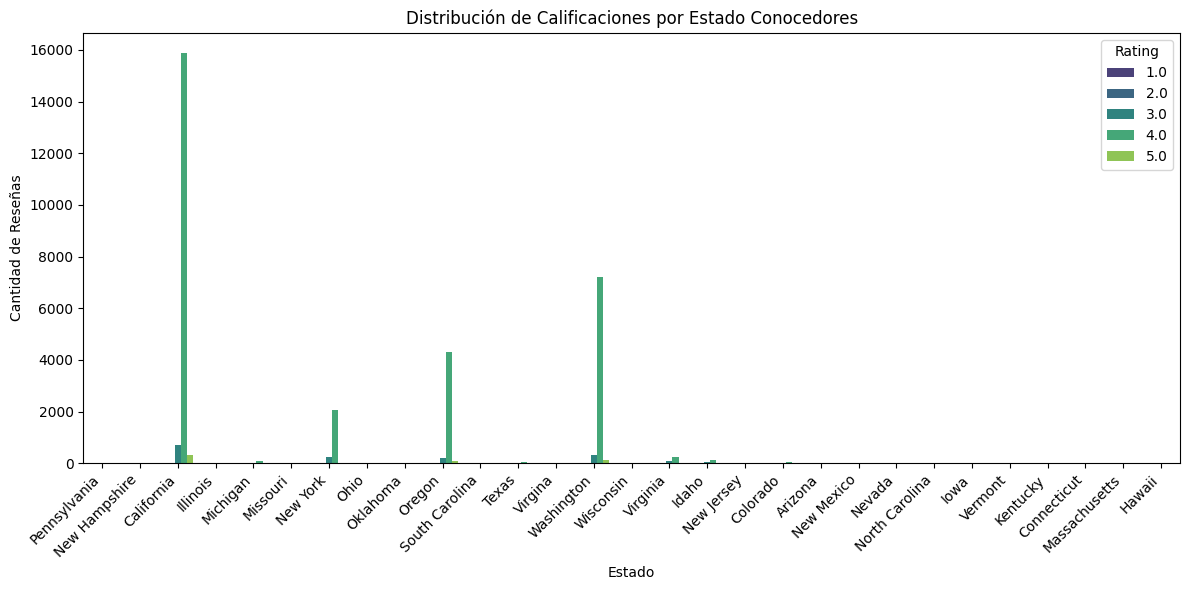

In [ ]:
#Distribucion de Calificaciones por Estado conocedores
df_filter = df[df['cluster']==0]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_filter, x='state', hue='rating', palette='viridis')
plt.title('Distribución de Calificaciones por Estado Conocedores')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Reseñas')
plt.legend(title='Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

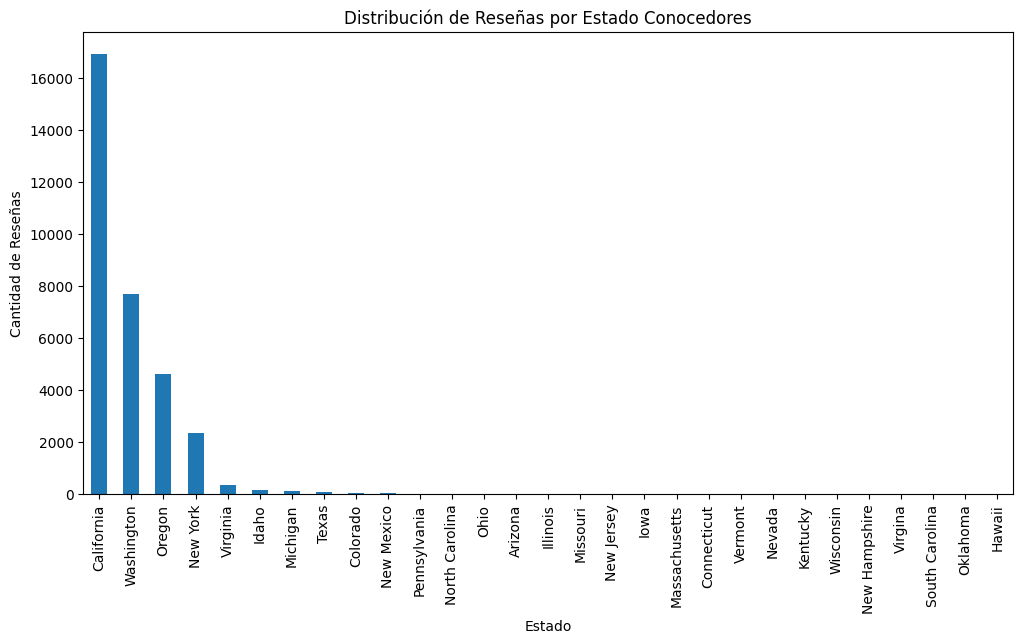

In [ ]:
# Contar la cantidad de reseñas por estado Conocedores
df_filter = df[df['cluster']==0]

state_counts = df_filter['state'].value_counts()

plt.figure(figsize=(12, 6))
state_counts.plot(kind='bar')
plt.title('Distribución de Reseñas por Estado Conocedores')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Reseñas')
plt.show()

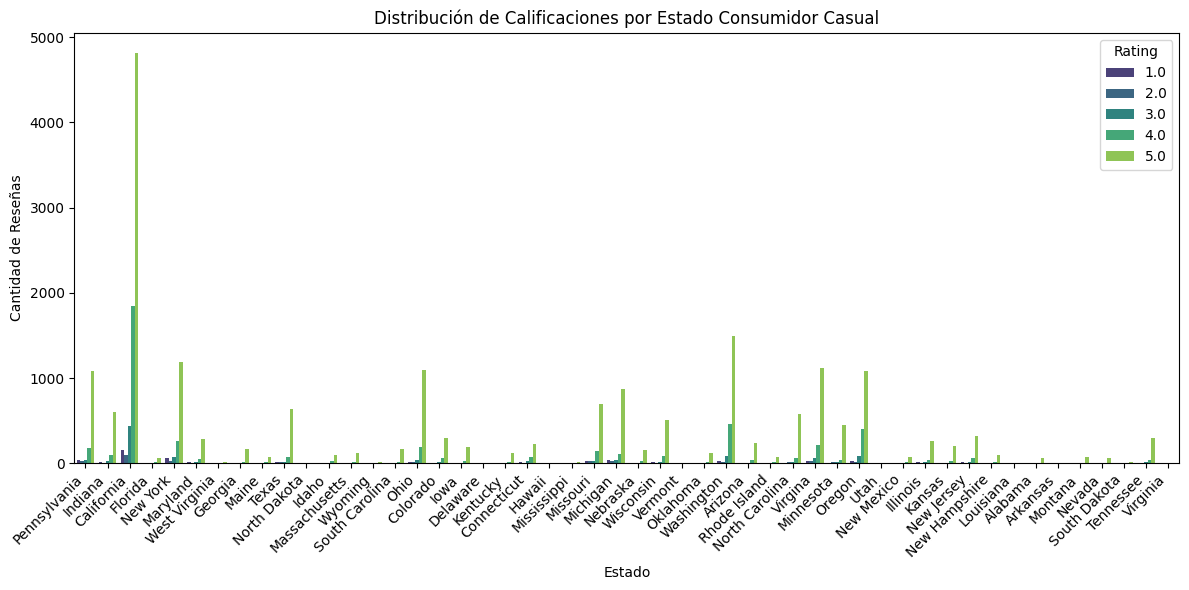

In [ ]:
#Distribucion de Calificaciones por Estado consumidor casual
df_filter = df[df['cluster']==1]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_filter, x='state', hue='rating', palette='viridis')
plt.title('Distribución de Calificaciones por Estado Consumidor Casual')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Reseñas')
plt.legend(title='Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

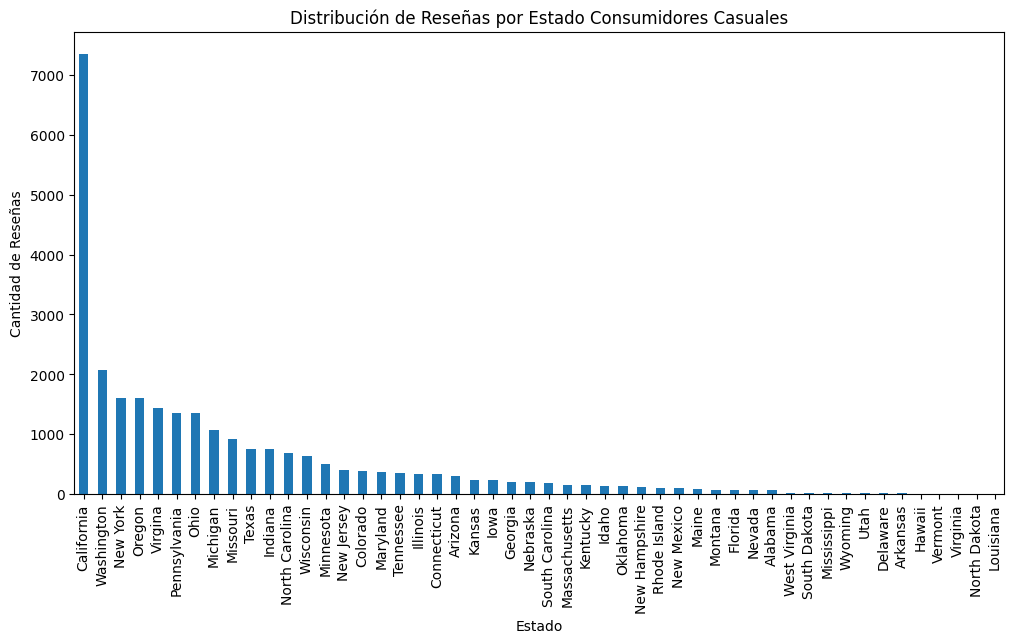

In [ ]:
# Contar la cantidad de reseñas por estado Consumidores Casuales
df_filter = df[df['cluster']==1]

state_counts = df_filter['state'].value_counts()

plt.figure(figsize=(12, 6))
state_counts.plot(kind='bar')
plt.title('Distribución de Reseñas por Estado Consumidores Casuales')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Reseñas')
plt.show()

Se observa que las reviews hechas por conocedores a diferencia de los consumidores casuales se concentran en los estados de california, washington, oregon y new york. Igualmente en la grafica podemos identificar que los conocedores predomina las reviews con un rating de 4, en cambio en los consumidores casuales predominan las reviews con rating de 5

## Kpi´s

# 1

In [ ]:
# reviews conocedores dataset de google yelp
df[(df['dataset']!='WineMagazin') & (df['cluster']==0)]['review_id'].count()

32

In [ ]:
# reviews consumidores casuales dataset google yelp
df[(df['dataset']!='WineMagazin') & (df['cluster']==1)]['review_id'].count()

24865

# 2

In [ ]:
# reviews business categoria principal wineries
df[df['categories'].apply(lambda x: (x[0]=='wineries' and True))]['review_id'].count()

2235

In [ ]:
# reviews business categoria principal wine tasting room
df[df['categories'].apply(lambda x: (x[0]=='wine tasting room' and True))]['review_id'].count()

1079

In [ ]:
# reviews business categoria principal winery
df[df['categories'].apply(lambda x: (x[0]=='winery' and True))]['review_id'].count()

53903

In [ ]:
# reviews business categoria principal vineyard
df[df['categories'].apply(lambda x: (x[0]=='vineyard' and True))]['review_id'].count()

2075

wineries dataset yelp y winery dataset google

# 3

In [ ]:
# promedio rating conocedor
df[df['cluster']==0]['rating'].mean()

3.964180766494479

In [ ]:
# promedio rating consumidor casual
df[df['cluster']==1]['rating'].mean()

4.61280272966658

# 4

In [ ]:
# promedio rating wineries
df[df['categories'].apply(lambda x: (x[0]=='wineries' and True))]['rating'].mean()

4.425055928411633

In [ ]:
# promedio rating wine tasting room
df[df['categories'].apply(lambda x: (x[0]=='wine tasting room' and True))]['rating'].mean()

4.632993512511585

In [ ]:
# # promedio rating winery
df[df['categories'].apply(lambda x: (x[0]=='winery' and True))]['rating'].mean()

4.228892640483832

In [ ]:
# promedio rating vineyard
df[df['categories'].apply(lambda x: (x[0]=='vineyard' and True))]['rating'].mean()

4.671807228915663

# 5

In [ ]:
# cantidad de reviews por estado
df[['state']].value_counts().head(10)

state       
California      24257
Washington       9743
Oregon           6195
New York         3934
Virgina          1434
Pennsylvania     1377
Ohio             1365
Michigan         1175
Missouri          927
Texas             839
dtype: int64

In [ ]:
# cantidad de business por estado
df[df['state']=='California']['business_name'].nunique()

3597

In [ ]:
# cantidad de business por estado
df[df['state']=='Washington']['business_name'].nunique()

814

In [ ]:
# cantidad de business por estado
df[df['state']=='Oregon']['business_name'].nunique()

625

In [ ]:
# cantidad de business por estado
df[df['state']=='New York']['business_name'].nunique()

276

In [ ]:
# cantidad de reviews por business
df[['state', 'business_name']].value_counts().head(10)

state           business_name                 
Washington      Chateau Ste. Michelle             171
                Columbia Crest                    146
Indiana         Peace Water Winery                143
North Carolina  Divine Llama Vineyards            129
Ohio            Brothers Drake Meadery            123
California      Wente Vineyards Tasting Lounge    116
South Carolina  City Scape Winery                 106
California      Testarossa                        100
Wisconsin       Fawn Creek Winery                 100
Washington      Maryhill                           97
dtype: int64

-----------------

--------------------------

-----------

In [16]:
# numero de reseñas en diferentes business por usuario
user_locations = df.groupby('user_id')['business_id'].nunique().reset_index().sort_values(by='business_id', ascending=False)
user_locations.rename(columns={'business_id': 'unique_locations'}, inplace=True)
user_locations['unique_locations'].value_counts()

1       20334
2        1393
3         284
4          92
5          44
6          17
7          11
8           4
9           3
10          2
12          2
978         1
13          1
1559        1
21          1
27          1
29          1
45          1
63          1
83          1
107         1
190         1
528         1
799         1
844         1
18          1
Name: unique_locations, dtype: int64

In [17]:
# numero de reseñas en diferentes state por usuario
user_locations = df.groupby('user_id')['state'].nunique().reset_index().sort_values(by='state', ascending=False)
user_locations.rename(columns={'state': 'unique_locations'}, inplace=True)
user_locations['unique_locations'].value_counts()

1     21968
2       209
3        16
4         4
15        1
14        1
12        1
5         1
Name: unique_locations, dtype: int64

In [48]:
# reseñas por usuario estado y negocio
df[['user_id', 'state', 'business_name']].value_counts().head(25)

user_id  state       business_name              
WM-8     California  Testarossa                     99
WM-10    Washington  Chateau Ste. Michelle          96
         Oregon      Chehalem                       88
         Washington  Columbia Crest                 85
         Oregon      Willamette Valley Vineyards    76
WM-12    Washington  Chateau Ste. Michelle          75
WM-10    Oregon      Adelsheim                      74
WM-1     New York    Lamoreaux Landing              72
                     Heron Hill                     69
WM-5     California  Naggiar                        69
WM-14    California  Williams Selyem                69
WM-10    Oregon      Domaine Serene                 68
WM-14    California  Lynmar                         67
WM-10    Oregon      Trisaetum                      67
WM-8     California  Fess Parker                    63
WM-10    Oregon      Abacela                        62
                     Torii Mor                      62
                

In [49]:
# un mismo usuario hace diferentes reseñas a un mismo negocio
df[(df['user_id']=='WM-8') & (df['business_name']=='Testarossa')]

,review_id,business_id,business_name,categories,state,user_id,rating,review,dataset,review processed,lenght review,cluster
24943,WM-46,WM-3516,Testarossa,"[winery, vineyard]",California,WM-8,4.0,"Cooked cranberry is spiced with anise, pepperc...",WineMagazin,cook cranberry spice anise peppercorn roast be...,28,0
25028,WM-131,WM-3516,Testarossa,"[winery, vineyard]",California,WM-8,4.0,There's an expert balance between lightly melt...,WineMagazin,expert balance lightly melt butter pithy meyer...,34,0
26572,WM-1675,WM-3516,Testarossa,"[winery, vineyard]",California,WM-8,4.0,Almost as good as some of the winery's best si...,WineMagazin,almost good winery best single vineyard bottli...,34,0
27083,WM-2186,WM-3516,Testarossa,"[winery, vineyard]",California,WM-8,4.0,Vanilla-soaked French toast and caramelized ap...,WineMagazin,vanilla soak french toast caramelize apple pro...,33,0
27219,WM-2322,WM-3516,Testarossa,"[winery, vineyard]",California,WM-8,4.0,"Crushed slate, plush rose petals, red cherry, ...",WineMagazin,crush slate plush rise petal red cherry smoke ...,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
56929,WM-32032,WM-3516,Testarossa,"[winery, vineyard]",California,WM-8,4.0,"Luscious golden in color, this dessert wine sh...",WineMagazin,luscious golden color dessert wine show aroma ...,22,0
57699,WM-32802,WM-3516,Testarossa,"[winery, vineyard]",California,WM-8,4.0,"Unique aromas of lime blossoms, flowering herb...",WineMagazin,unique aroma lime blossom flower herb tiny bit...,28,0
58132,WM-33235,WM-3516,Testarossa,"[winery, vineyard]",California,WM-8,4.0,"Gravenstein apple, crisp Bosc pear, seared lem...",WineMagazin,gravenstein apple crisp bosc pear sear lemon t...,38,0
58344,WM-33447,WM-3516,Testarossa,"[winery, vineyard]",California,WM-8,4.0,"Light and easy on the nose with hibiscus, cran...",WineMagazin,light easy nose hibiscus cranberry pomegranate...,31,0


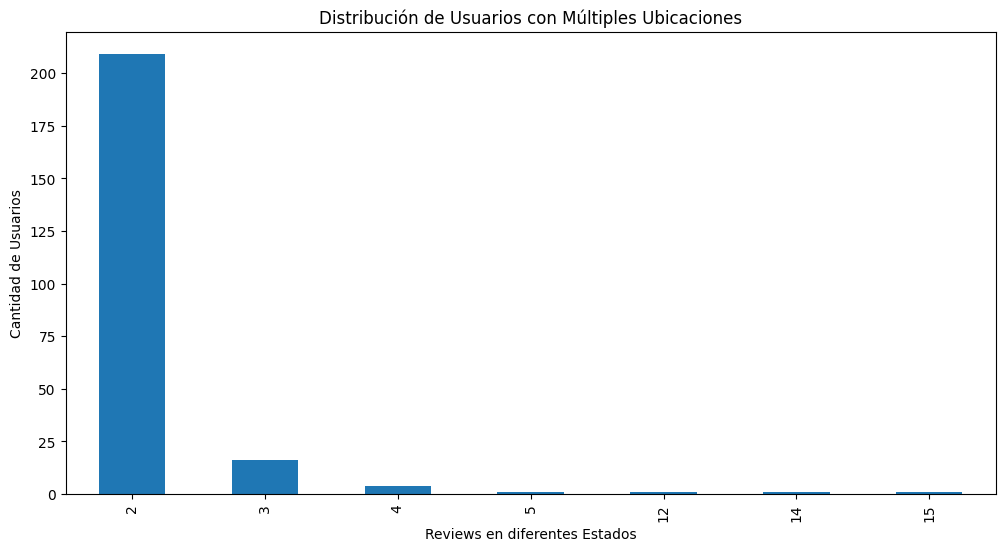

In [ ]:
# numero de reseñas en diferentes state por usuario
# Filtrar usuarios con múltiples ubicaciones geográficas
user_locations = user_locations[user_locations['unique_locations'] > 1]

plt.figure(figsize=(12, 6))
user_locations['unique_locations'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribución de Usuarios con Múltiples Ubicaciones')
plt.xlabel('Reviews en diferentes Estados')
plt.ylabel('Cantidad de Usuarios')
plt.show()

---------------

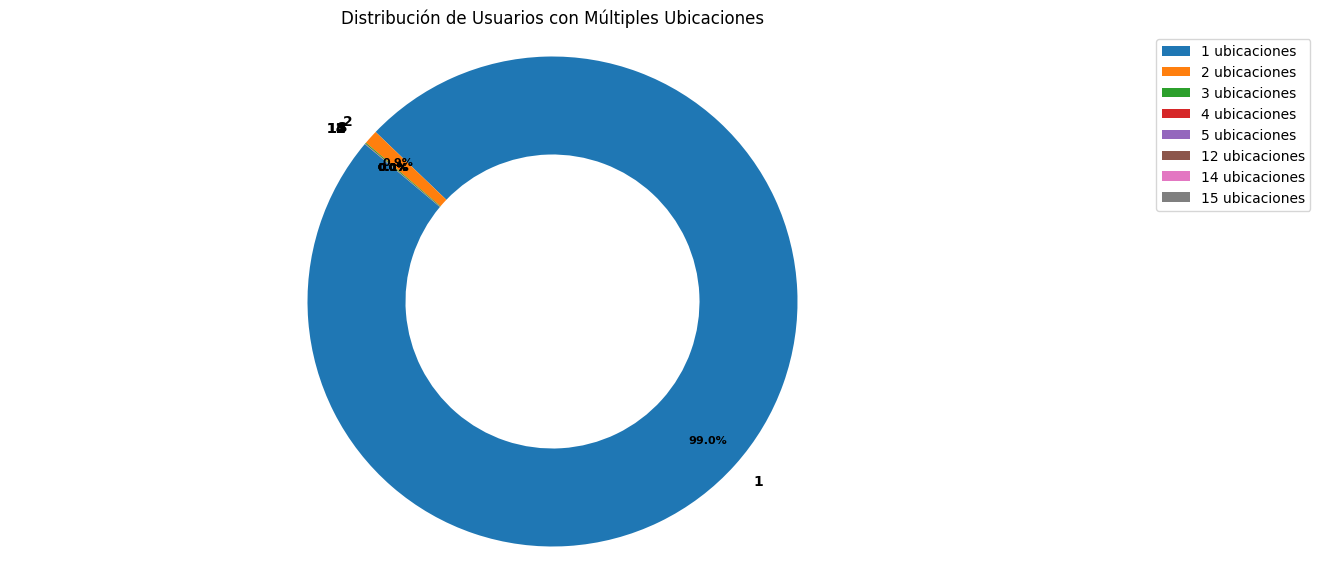

In [ ]:
# Calcular la cantidad de usuarios por cada cantidad de ubicaciones
count_by_unique_locations = user_locations['unique_locations'].value_counts().sort_index()

# Calcular los porcentajes
percentages = (count_by_unique_locations / count_by_unique_locations.sum() * 100).round(1)

# gráfico de torta
fig, ax = plt.subplots(figsize=(14, 7))
wedges, texts, autotexts = ax.pie(
    count_by_unique_locations,
    labels=count_by_unique_locations.index,
    startangle=140,
    pctdistance=0.85,
    autopct='',
    wedgeprops=dict(width=0.4)
)

# Agregar porcentajes a las etiquetas
for text, autotext, percentage in zip(texts, autotexts, percentages):
    text.set(size=10, weight='bold')
    autotext.set(size=8, weight='bold')
    autotext.set_text(f"{percentage}%")

# Agregar una referencia de colores
plt.gca().legend(labels=[f'{i} ubicaciones' for i in count_by_unique_locations.index], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Distribución de Usuarios con Múltiples Ubicaciones')
plt.axis('equal')

plt.show()
